In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd

In [19]:
dir = "/Users/akterminsprove/Desktop/DTU/Kandidat - Business Analytics/3. Semester/COMPSCI 285-001 Deep Reinforcement Learning/homework_fall2022/hw3/data/"

In [20]:

from tensorflow.python.summary.summary_iterator import summary_iterator

def get_from_logfile(dir, paths, labels, tags):

    for num, path in enumerate(paths):    
        
        returns = np.empty((100000,len(tags)))
        returns[:] = np.nan
        it_list = np.ones(len(tags))
        it_list[0] = 0
        it = 0
        
        for event in summary_iterator(dir+path):

            for value in event.summary.value:

                if value.tag in tags:
                    idx = tags.index(value.tag)
                    returns[int(it_list[idx]), idx] = value.simple_value
                    it_list[idx] +=1

            it += 1


    return pd.DataFrame(returns, columns = labels).dropna()


In [21]:

from tensorflow.python.summary.summary_iterator import summary_iterator

def get_from_logfile(dir, path, labels, tags):
        
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    idx_step = 0
    it = 0
    
    for event in summary_iterator(dir+path):

        for value in event.summary.value:

            if value.tag in tags:
                idx = tags.index(value.tag)
                #print(value.tag )
                returns[idx_step, idx] = value.simple_value

                if idx == 0 and it!=0:
                    idx_step +=1
                    #print(idx_step)
            it += 1

    return pd.DataFrame(returns, columns = labels).dropna(subset=[labels[0]])

## QUESTION 1: Basic Q-learning performance (DQN)

In [22]:
labels= ['EnvStepSoFar','Train Average Return','Train Best Return']

paths = "q1_MsPacman-v0_07-10-2022_15-16-31/events.out.tfevents.1665180991.Ann-katrine-christiansens-MacBook-Air-4.local"

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn', 'Train_BestReturn']

df = get_from_logfile(dir, paths, labels,tags)

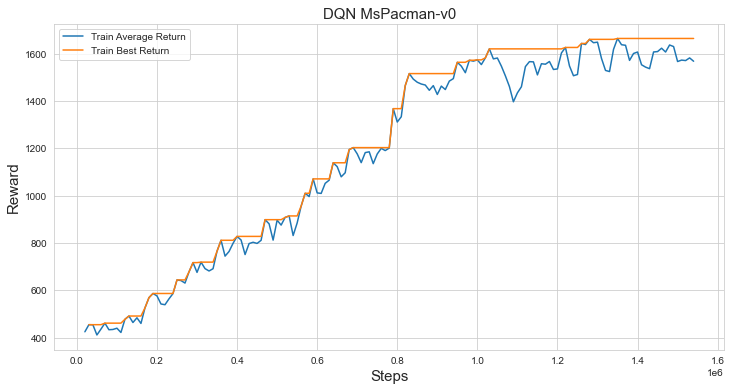

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df.iloc[:,0],df.iloc[:,1], label = labels[1])
plt.plot(df.iloc[:,0],df.iloc[:,2], label = labels[2])
plt.legend()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Reward', size=15)
plt.title('DQN MsPacman-v0', size=15);
plt.savefig('Plots/Question1.png')

## QUESTION 2: double Q-learning (DDQN)

In [24]:
paths = ["q2_doubledqn_1_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q2_doubledqn_2_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q2_doubledqn_3_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn']
#labels= ['EnvStepSoFar','Train Average Return']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar Seed {num+1}',f'Train Average Return Seed {num+1}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

df_all.set_index(['EnvStepSoFar Seed 1'], inplace=True)

ddqn = df_all[['Train Average Return Seed 1','Train Average Return Seed 2','Train Average Return Seed 3']].mean(axis=1)

In [25]:
paths = ["q2_dqn_1_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q2_dqn_2_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q2_dqn_3_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local"]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn']
#labels= ['EnvStepSoFar','Train Average Return']

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar Seed {num+1}',f'Train Average Return Seed {num+1}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

df_all.set_index(['EnvStepSoFar Seed 1'], inplace=True)

dqn = df_all[['Train Average Return Seed 1','Train Average Return Seed 2','Train Average Return Seed 3']].mean(axis=1)

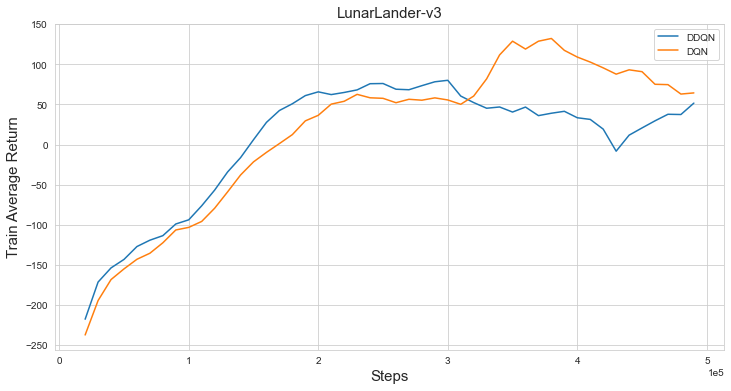

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(ddqn, label = "DDQN")
plt.plot(dqn, label = "DQN")
plt.legend()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Train Average Return', size=15)
plt.title('LunarLander-v3', size=15);
plt.savefig('Plots/Question2.png')

## Question 3: Experimenting with hyperparameters

In [27]:
paths = ["q3_0.0001_LunarLander-v3_15-10-2022_16-30-57/events.out.tfevents.1665876657.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q3_0.0005_LunarLander-v3_14-10-2022_20-16-16/events.out.tfevents.1665803776.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q2_dqn_1_LunarLander-v3_07-10-2022_21-04-29/events.out.tfevents.1665201869.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q3_0.005_LunarLander-v3_14-10-2022_23-37-33/events.out.tfevents.1665815853.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q3_0.01_LunarLander-v3_15-10-2022_10-57-17/events.out.tfevents.1665856637.Ann-katrine-christiansens-MacBook-Air-4.local",]

tags = ['Train_EnvstepsSoFar', 'Train_AverageReturn']
lrs = [0.0001,0.0005, 0.001, 0.005,0.01]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {str(lrs[num])}',f'Train Average Return {str(lrs[num])}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)


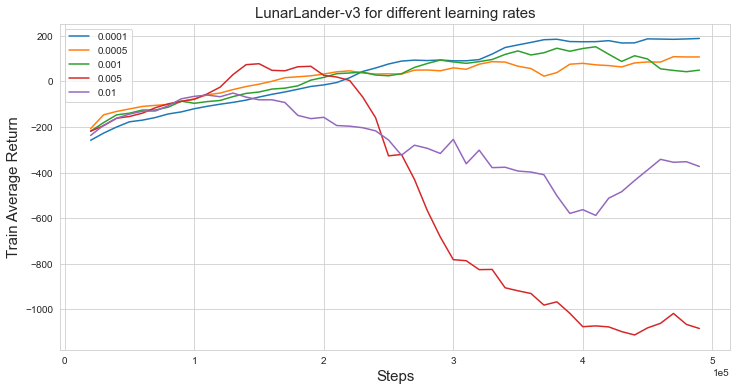

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

for lr in lrs: 
    plt.plot(df_all[f'EnvStepSoFar {str(lr)}'], df_all[f'Train Average Return {str(lr)}'], label = str(lr))

plt.legend()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Train Average Return', size=15)
plt.title('LunarLander-v3 for different learning rates', size=15);
plt.savefig('Plots/Question3.png')

## Question 4: Sanity check with Cartpole

In [29]:
paths = ["q4_ac_1_1_CartPole-v0_08-10-2022_11-24-42/events.out.tfevents.1665253482.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q4_ac_1_100_CartPole-v0_08-10-2022_11-24-42/events.out.tfevents.1665253482.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q4_ac_10_10_CartPole-v0_08-10-2022_11-24-42/events.out.tfevents.1665253482.Ann-katrine-christiansens-MacBook-Air-4.local",
        "q4_ac_100_1_CartPole-v0_08-10-2022_11-24-42/events.out.tfevents.1665253482.Ann-katrine-christiansens-MacBook-Air-4.local",]

tags = ['Train_EnvstepsSoFar', 'Eval_AverageReturn']
params = ["ntu = 1 & ngsptu = 1", "ntu = 1 & ngsptu = 100","ntu = 10 & ngsptu = 10","ntu = 100 & ngsptu = 1" ]

for num,path in enumerate(paths):
    labels= [f'EnvStepSoFar {params[num]}',f'Eval Average Return {params[num]}']
    df = get_from_logfile(dir, path, labels, tags)

    if num ==0:
        df_all = df.copy()

    else:
        df_all = pd.concat([df_all,df], axis=1)

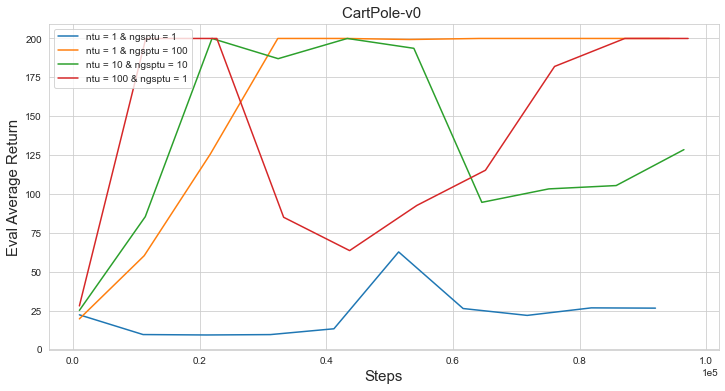

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

for param in params: 
    plt.plot(df_all[f'EnvStepSoFar {param}'], df_all[f'Eval Average Return {param}'], label = param)

plt.legend()
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Eval Average Return', size=15)
plt.title('CartPole-v0 ', size=15);
plt.savefig('Plots/Question4.png')

## Question 5: Run actor-critic with more difficult tasks

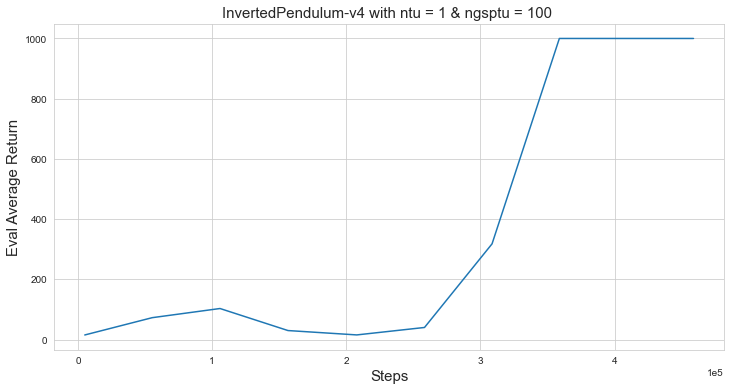

In [31]:
labels= ['EnvStepSoFar','Eval Average Return']

paths = "q5_1_100_InvertedPendulum_InvertedPendulum-v4_08-10-2022_11-38-40/events.out.tfevents.1665254320.Ann-katrine-christiansens-MacBook-Air-4.local"

tags = ['Train_EnvstepsSoFar', 'Eval_AverageReturn']

df = get_from_logfile(dir, paths, labels,tags)


fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df.iloc[:,0],df.iloc[:,1])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Eval Average Return', size=15)
plt.title('InvertedPendulum-v4 with ntu = 1 & ngsptu = 100 ', size=15);
plt.savefig('Plots/Question5a.png')

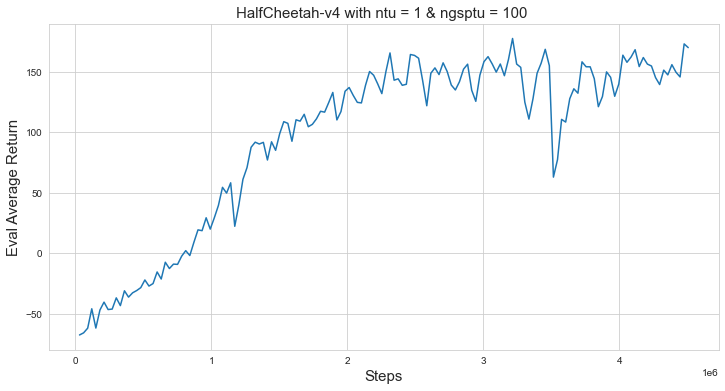

In [32]:
labels= ['EnvStepSoFar','Eval Average Return']

paths = "q5_1_100_HalfCheetah_HalfCheetah-v4_08-10-2022_11-38-40/events.out.tfevents.1665254320.Ann-katrine-christiansens-MacBook-Air-4.local"

tags = ['Train_EnvstepsSoFar', 'Eval_AverageReturn']

df = get_from_logfile(dir, paths, labels,tags)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df.iloc[:,0],df.iloc[:,1])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Eval Average Return', size=15)
plt.title('HalfCheetah-v4 with ntu = 1 & ngsptu = 100 ', size=15);
plt.savefig('Plots/Question5b.png')

## Question 6: Run soft actor-critic more difficult tasks.

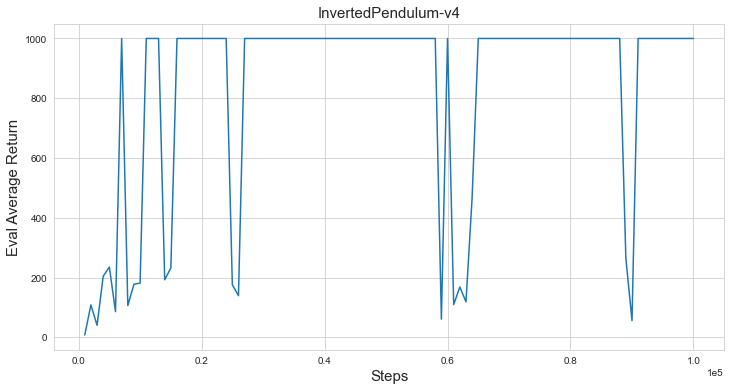

In [33]:
labels= ['EnvStepSoFar','Eval Average Return']

paths = "q6a_sac_InvertedPendulum_InvertedPendulum-v4_14-10-2022_19-51-06/events.out.tfevents.1665802266.Ann-katrine-christiansens-MacBook-Air-4.local"

tags = ['Train_EnvstepsSoFar', 'Eval_AverageReturn']

df = get_from_logfile(dir, paths, labels,tags)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df.iloc[:,0],df.iloc[:,1])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Eval Average Return', size=15)
plt.title('InvertedPendulum-v4', size=15);
plt.savefig('Plots/Question6a.png')

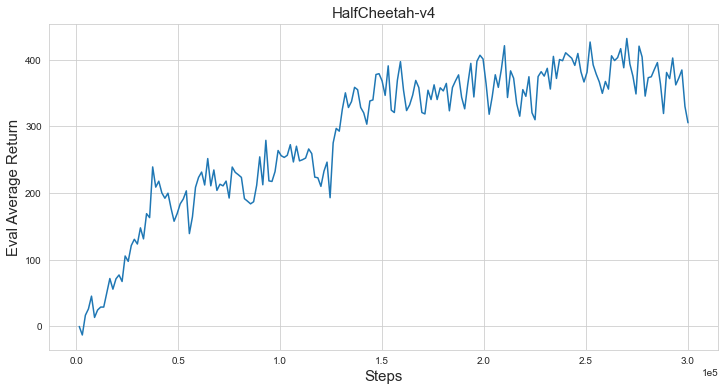

In [34]:
labels= ['EnvStepSoFar','Eval Average Return']

paths = "q6b_sac_HalfCheetah_HalfCheetah-v4_14-10-2022_00-05-59/events.out.tfevents.1665731159.Ann-katrine-christiansens-MacBook-Air-4.local"

tags = ['Train_EnvstepsSoFar', 'Eval_AverageReturn']

df = get_from_logfile(dir, paths, labels,tags)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df.iloc[:int(200000/1000),0],df.iloc[:int(200000/1000),1])
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Steps', size=15)
plt.ylabel('Eval Average Return', size=15)
plt.title('HalfCheetah-v4', size=15);
plt.savefig('Plots/Question6b.png')